In [1]:
import requests
import json
import csv
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from config import api_key
import seaborn as sn
from scipy.stats import linregress
import scipy.stats as stats

In [2]:
csvfile = "./Resources/2019.csv"
csv_df = pd.read_csv(csvfile)
csv_df["Year"] = "2019"
len(csv_df)

620

In [3]:
csvfile18 = "./Resources/2018.csv"
csv_df18 = pd.read_csv(csvfile18)
csv_df18["Year"] = "2018"
len(csv_df18)

622

In [4]:
csvfile17 = "./Resources/2017.csv"
csv_df17 = pd.read_csv(csvfile17)
csv_df17["Year"] = "2017"
len(csv_df17)

571

In [5]:
csvfile16 = "./Resources/2016.csv"
csv_df16 = pd.read_csv(csvfile16)
csv_df16["Year"] = "2016"
len(csv_df16)

584

In [6]:
csvfile15 = "./Resources/2015.csv"
csv_df15 = pd.read_csv(csvfile15)
csv_df15["Year"] = "2015"
len(csv_df15)

595

In [7]:
combined_df = csv_df.append(csv_df18)
combined_df = combined_df.append(csv_df17)
combined_df = combined_df.append(csv_df16)
combined_df = combined_df.append(csv_df15)
combined_df.drop("Unnamed: 0", axis=1, inplace=True)

In [8]:
playercsv = "./Resources/player_data.csv"
player_df = pd.read_csv(playercsv)
merged_df = pd.merge(combined_df, player_df, left_on = "Player", right_on = "Name", how="left")
merged_df.drop(columns=["G", "GS", "Att", "Yds", "Att.1", "Yds.1", "Yds.2", "Name", "Salary"], inplace=True)
merged_df.drop("Unnamed: 0", axis=1, inplace=True)
merged_df.rename(columns={
    "Tm": "Team",
    "Cmp": "Completions",
    "Int": "Interceptions",
    "Tgt": "Targets",
    "Y/R": "YdsPerRec",
    "Rec": "Receptions",
    "Year": "FantasyYear"
}, inplace=True)

In [9]:
bins = [0,5,10,15,20,25]
group_names = ['0-5 yrs', '5-10 yrs', '10-15 yrs', '15-20 yrs', '20-25 yrs']
merged_df["Exper_Bins"] = pd.cut(merged_df["Experience"], bins, labels=group_names, include_lowest=True)

In [10]:
qb_data = merged_df.loc[merged_df['Pos']=='QB']
rb_data = merged_df.loc[merged_df['Pos']=='RB']
wr_data = merged_df.loc[merged_df['Pos']=='WR']
te_data = merged_df.loc[merged_df['Pos']=='TE']

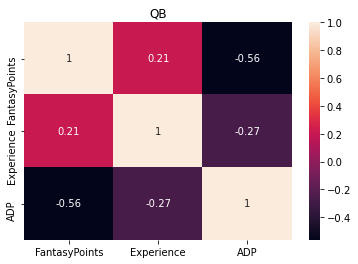

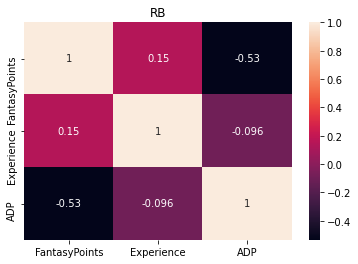

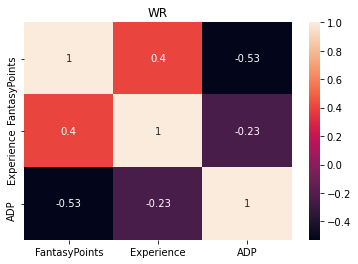

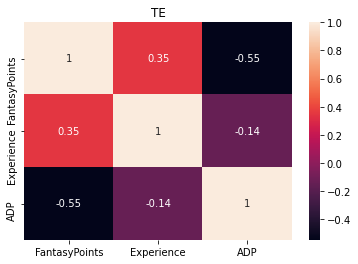

In [11]:
corrMatrix = qb_data[['FantasyPoints', 'Experience', 'ADP']].corr()
sn.heatmap(corrMatrix, annot=True).set_title("QB")
plt.savefig('./Images/CorrMat_QB.png')
plt.show()

corrMatrix = rb_data[['FantasyPoints', 'Experience', 'ADP']].corr()
sn.heatmap(corrMatrix, annot=True).set_title("RB")
plt.savefig('./Images/CorrMat_RB.png')
plt.show()

corrMatrix = wr_data[['FantasyPoints', 'Experience', 'ADP']].corr()
sn.heatmap(corrMatrix, annot=True).set_title("WR")
plt.savefig('./Images/CorrMat_WR.png')
plt.show()

corrMatrix = te_data[['FantasyPoints', 'Experience', 'ADP']].corr()
sn.heatmap(corrMatrix, annot=True).set_title("TE")
plt.savefig('./Images/CorrMat_TE.png')
plt.show()


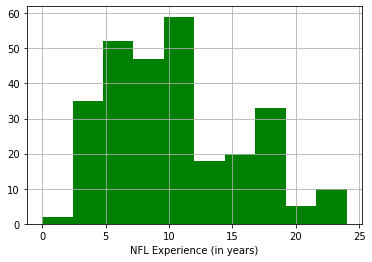

In [12]:
qb_data['Experience'].hist(color="green").set_xlabel("NFL Experience (in years)")
plt.savefig('./Images/Histogram_QB.png')

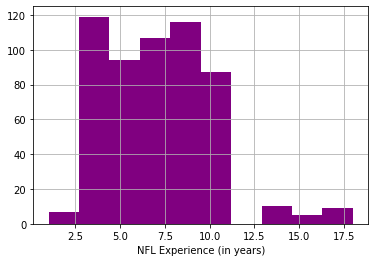

In [13]:
rb_data['Experience'].hist(color="purple").set_xlabel("NFL Experience (in years)")
plt.savefig('./Images/Histogram_RB.png')

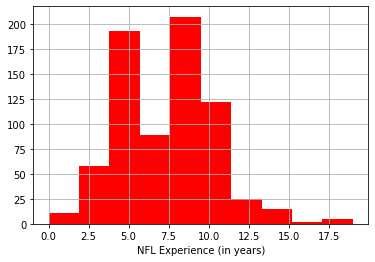

In [14]:
wr_data['Experience'].hist(color="red").set_xlabel("NFL Experience (in years)")
plt.savefig('./Images/Histogram_WR.png')

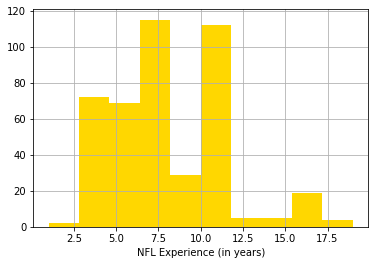

In [15]:
te_data['Experience'].hist(color="gold").set_xlabel("NFL Experience (in years)")
plt.savefig('./Images/Histogram_TE.png')

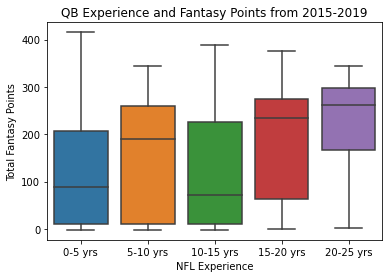

The p value from the ANOVA test comparing Experience to Fantasy Points for the quarter back position is 0.0015238308466153973.
This tells us there is not a relationship between Experience and Fantasy Points.


,Experience,ADP,FantasyPoints
count,252.000000,252.000000,252.000000
mean,10.781746,446.082540,142.022460
std,5.394772,342.453867,120.715284
min,3.000000,16.400000,-2.300000
25%,7.000000,145.800000,16.210000
50%,10.000000,485.200000,132.960000
75%,14.250000,611.375000,256.605000
max,24.000000,1808.800000,415.680000


In [16]:
qb = sn.boxplot(x="Exper_Bins", y="FantasyPoints", data=qb_data.dropna()).set_title('QB Experience and Fantasy Points from 2015-2019')
plt.xlabel('NFL Experience')
plt.ylabel('Total Fantasy Points')
plt.savefig('./Images/BoxPlot_QB.png')
plt.show()
group1 = qb_data[qb_data["Exper_Bins"] == "0-5 yrs"]["FantasyPoints"].dropna()
group2 = qb_data[qb_data["Exper_Bins"] == "5-10 yrs"]["FantasyPoints"].dropna()
group3 = qb_data[qb_data["Exper_Bins"] == "10-15 yrs"]["FantasyPoints"].dropna()
group4 = qb_data[qb_data["Exper_Bins"] == "15-20 yrs"]["FantasyPoints"].dropna()
group5 = qb_data[qb_data["Exper_Bins"] == "20-25 yrs"]["FantasyPoints"].dropna()
qb = stats.f_oneway(group1, group2, group3, group4, group5)
print(f'The p value from the ANOVA test comparing Experience to Fantasy Points for the quarter back position is {qb[1]}.')
print(f'This tells us there is not a relationship between Experience and Fantasy Points.')
qb_data[['Experience','ADP','FantasyPoints']].dropna().describe()

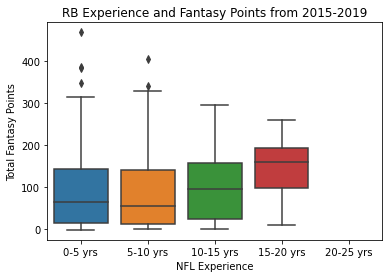

The p value from the ANOVA test comparing Experience to Fantasy Points for the running back position is 0.14530633668951118.
This tells us there could be a relationship between Experience and Fantasy Points.


,Experience,ADP,FantasyPoints
count,421.000000,421.000000,421.000000
mean,7.211401,428.957007,90.745653
std,3.054343,395.384999,88.167095
min,1.000000,1.700000,-2.000000
25%,5.000000,157.600000,14.100000
50%,7.000000,304.000000,68.400000
75%,9.000000,589.600000,145.200000
max,18.000000,2019.900000,469.200000


In [17]:
rb = sn.boxplot(x="Exper_Bins", y="FantasyPoints", data=rb_data.dropna()).set_title('RB Experience and Fantasy Points from 2015-2019')
plt.xlabel('NFL Experience')
plt.ylabel('Total Fantasy Points')
plt.savefig('./Images/BoxPlot_RB.png')
plt.show()
group1 = rb_data[rb_data["Exper_Bins"] == "0-5 yrs"]["FantasyPoints"].dropna()
group2 = rb_data[rb_data["Exper_Bins"] == "5-10 yrs"]["FantasyPoints"].dropna()
group3 = rb_data[rb_data["Exper_Bins"] == "10-15 yrs"]["FantasyPoints"].dropna()
group4 = rb_data[rb_data["Exper_Bins"] == "15-20 yrs"]["FantasyPoints"].dropna()
rb = stats.f_oneway(group1, group2, group3, group4)
print(f'The p value from the ANOVA test comparing Experience to Fantasy Points for the running back position is {rb[1]}.')
print(f'This tells us there could be a relationship between Experience and Fantasy Points.')
rb_data[['Experience','ADP','FantasyPoints']].dropna().describe()

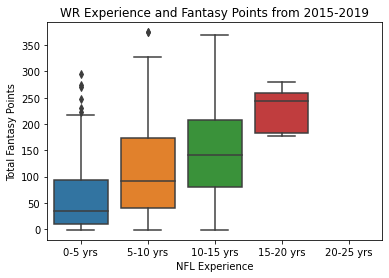

The p value from the ANOVA test comparing Experience to Fantasy Points for the wide receiver position is 1.016888960141898e-24.
This tells us there is not a relationship between Experience and Fantasy Points.


,Experience,ADP,FantasyPoints
count,588.000000,588.000000,588.000000
mean,7.399660,476.594728,98.109116
std,3.104396,428.235265,86.170850
min,1.000000,10.100000,-1.500000
25%,5.000000,151.275000,23.425000
50%,8.000000,315.400000,71.650000
75%,9.000000,816.700000,157.175000
max,19.000000,2011.800000,374.600000


In [18]:
wr = sn.boxplot(x="Exper_Bins", y="FantasyPoints", data=wr_data.dropna()).set_title('WR Experience and Fantasy Points from 2015-2019')
plt.xlabel('NFL Experience')
plt.ylabel('Total Fantasy Points')
plt.savefig('./Images/BoxPlot_WR.png')
plt.show()
group1 = wr_data[wr_data["Exper_Bins"] == "0-5 yrs"]["FantasyPoints"].dropna()
group2 = wr_data[wr_data["Exper_Bins"] == "5-10 yrs"]["FantasyPoints"].dropna()
group3 = wr_data[wr_data["Exper_Bins"] == "10-15 yrs"]["FantasyPoints"].dropna()
group4 = wr_data[wr_data["Exper_Bins"] == "15-20 yrs"]["FantasyPoints"].dropna()
wr = stats.f_oneway(group1, group2, group3, group4)
print(f'The p value from the ANOVA test comparing Experience to Fantasy Points for the wide receiver position is {wr[1]}.')
print(f'This tells us there is not a relationship between Experience and Fantasy Points.')
wr_data[['Experience','ADP','FantasyPoints']].dropna().describe()

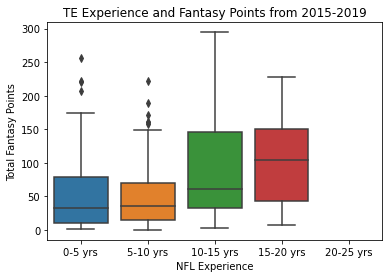

The p value from the ANOVA test comparing Experience to Fantasy Points for the tight end position is 1.5732895768458249e-12.
This tells us there is not a relationship between Experience and Fantasy Points.


,Experience,ADP,FantasyPoints
count,358.000000,358.000000,358.000000
mean,8.013966,536.116760,62.869274
std,3.349372,303.356988,61.840922
min,3.000000,25.200000,-0.200000
25%,5.000000,385.400000,15.650000
50%,8.000000,515.000000,39.950000
75%,11.000000,656.050000,92.450000
max,19.000000,2021.000000,294.600000


In [19]:
te = sn.boxplot(x="Exper_Bins", y="FantasyPoints", data=te_data.dropna()).set_title('TE Experience and Fantasy Points from 2015-2019')
plt.xlabel('NFL Experience')
plt.ylabel('Total Fantasy Points')
plt.savefig('./Images/BoxPlot_TE.png')
plt.show()
group1 = te_data[te_data["Exper_Bins"] == "0-5 yrs"]["FantasyPoints"].dropna()
group2 = te_data[te_data["Exper_Bins"] == "5-10 yrs"]["FantasyPoints"].dropna()
group3 = te_data[te_data["Exper_Bins"] == "10-15 yrs"]["FantasyPoints"].dropna()
group4 = te_data[te_data["Exper_Bins"] == "15-20 yrs"]["FantasyPoints"].dropna()
te = stats.f_oneway(group1, group2, group3, group4)
print(f'The p value from the ANOVA test comparing Experience to Fantasy Points for the tight end position is {te[1]}.')
print(f'This tells us there is not a relationship between Experience and Fantasy Points.')
te_data[['Experience','ADP','FantasyPoints']].dropna().describe()